In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels
from statsmodels.tools.eval_measures import rmse
import matplotlib
import matplotlib.font_manager as fm
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc('axes', unicode_minus=False)

___ 
# <span style="color:red">문제 1</span>
- #### 콘크리트 강도를 예측하는 의사결정나무 모델을 만들고 predict method를 이용하여 예측값을 구하라.
- #### 데이터 : Concrete.csv(변수 : 9개, 자료 수 : 1,030개)
- #### 목표변수 : strength 

### 문제풀이
    1. 데이터 불러오기 및 목표변수 설정, 데이터 분할하기
    2. 의사결정나무 모델 생성 - Parameter 조정 및 평가
        - 1. 잎사귀 노드의 최소 자료 수 변경
        - 2. 분리 노드의 최소 자료 수 변경
        - 3. 최대 깊이 변경
    3. 최종 모델 선정
    4. 트리 모델 시각화 및 해석
    5. 결론

In [4]:
# 데이터 불러오기
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/Concrete.csv', encoding='euc-kr')
df_raw.head()

# 목표변수 설정하기
df_raw_y = df_raw["strength"]
df_raw_x = df_raw.drop("strength", axis=1, inplace=False)

In [5]:
# train과 test 데이터를 7:3 비율로 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (618, 8)
train data Y size : (618,)
test data X size : (412, 8)
test data Y size : (412,)


In [6]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# score는 각 Train과 Test의 설명력을 의미한다.
print("Score on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.996
Score on test set : 0.790


In [7]:
# 모델의 파라미터 조정하기 - 1. 잎사귀 노드의 최소 자료 수 변경
train_score = []
test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1, 18)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.996,0.790
1,2,0.978,0.783
2,3,0.959,0.786
3,4,0.943,0.796
4,5,0.934,0.811
5,6,0.920,0.810
6,7,0.909,0.799
7,8,0.900,0.792
8,9,0.877,0.817
9,10,0.868,0.816


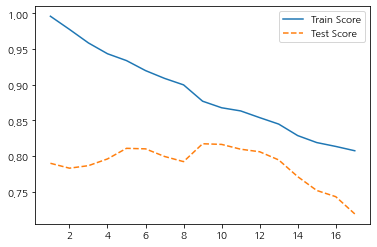

In [8]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.legend()

## <span style="color:green">잎사귀 노드 최소 자료 수 변경 결과</span>
- Leaf가 10일 때, TrainScore와 TestScore의 차이가 가장 적으며, 두 수 다 큰 값을 갖는다.

In [9]:
# 모델의 파라미터 조정하기 - 2. 분리 노드의 최소 자료 수 변경
train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(2, 25)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=10, min_impurity_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.868,0.816
1,6,0.868,0.816
2,8,0.868,0.816
3,10,0.867,0.816
4,12,0.867,0.816
5,14,0.866,0.815
6,16,0.866,0.815
7,18,0.866,0.815
8,20,0.866,0.815
9,22,0.863,0.809


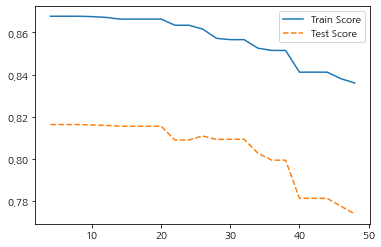

In [10]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.legend()

## <span style="color:green">분리 노드의 최소 자료 수 변경 결과</span>
- split의 26일 때, TrainScore와 TestScore의 차이가 가장 적으며, 두 수 다 큰 값을 갖는다.

In [11]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1, 10)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=10, min_samples_split=26, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.249,0.243
1,2,0.474,0.406
2,3,0.644,0.567
3,4,0.745,0.682
4,5,0.814,0.739
5,6,0.843,0.787
6,7,0.852,0.798
7,8,0.854,0.799
8,9,0.855,0.799


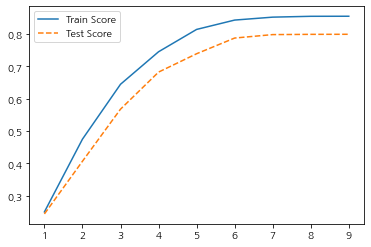

In [12]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.legend()

## <span style="color:green">최대 깊이 변경 결과</span>
- depth의 크기가 7일 때, TrainScore와 TestScore의 차이가 제일 적으며, 값이 크다.

## <span style="color:blue">모델 학습</span>
- 앞서 확인한 leaf=10, split=26, depth=7의 파라미터를 적용하여 모델을 학습한다.

In [13]:
tree_final = DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=26, max_depth=7, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=10, min_samples_split=26,
                      random_state=1234)

In [38]:
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,age,0.366
0,cement,0.262
3,water,0.206
1,blast_furnace_slag,0.046
4,superplasticizer,0.037
2,fly_ash,0.033
6,fine_aggregate,0.031
5,coarse_aggregate,0.018


In [39]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.996
Score on test set : 0.790


In [40]:
# 최종 모델 선정 및 학습
model_final = DecisionTreeRegressor()
model_final.fit(df_train_x, df_train_y)
y_pred = model_final.predict(df_test_x)

df_result = pd.DataFrame()
df_result["실제값"] = df_test_y
df_result["예측값"] = y_pred
df_result

,실제값,예측값
369,15.34,15.61
544,14.60,10.22
500,57.92,61.86
199,15.04,19.52
262,44.40,42.55
...,...,...
115,35.10,38.60
512,32.11,32.01
232,50.77,53.90
980,26.92,44.61


In [41]:
# 예측값과 mse
DecisionTreeMEAN = df_result["예측값"].mean()
DecisionTreeMSE = statsmodels.tools.eval_measures.mse(df_result["실제값"], df_result["예측값"], axis=0)

print('*** DecisionTree mean, mse ***','\n')
print(f"     {DecisionTreeMEAN}\n     {DecisionTreeMSE}")

*** DecisionTree mean, mse *** 

     36.65720873786409
     52.289063592233006


Text(0, 0.5, '변수')

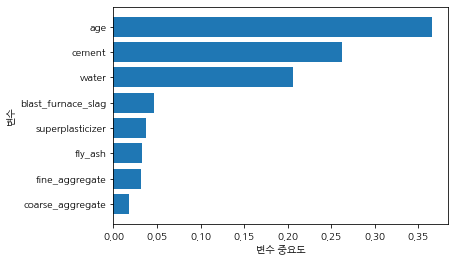

In [42]:
# 변수 별 중요도
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

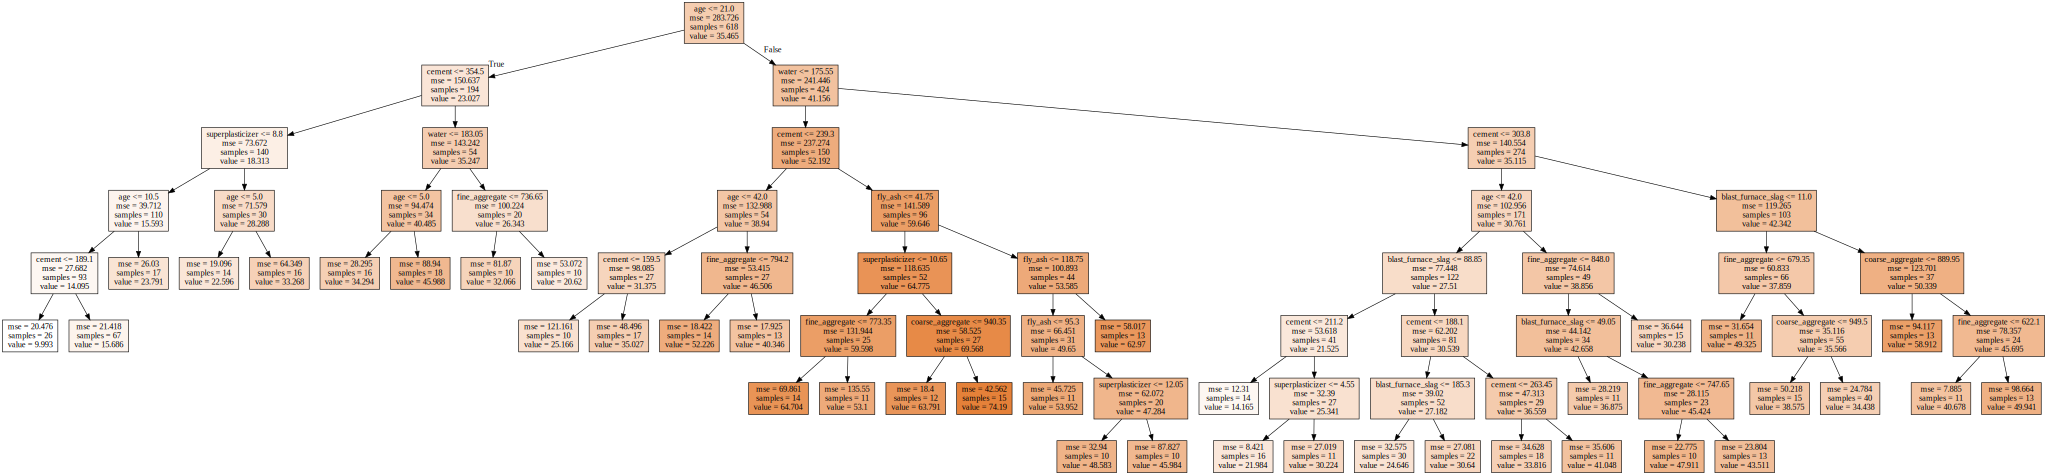

In [43]:
# 최종 의사결정 트리 시각화
v_feature_name = df_train_x.columns
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=10, min_impurity_split=26, max_depth=7)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot", feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## <span style="color:red">결론</span>
- 앞서 확인한 leaf=10, split=26, depth=7의 파라미터를 적용하여 모델을 학습하고, 테스트 데이터를 통해 검사한 결과
- 'strength' 변수에 대한 예측값은 약 36.57로 예상할 수 있다.
- 또한 변수 중요도를 살펴본 결과 age, cement, water의 항목에 따라 결과값이 영향을 받는다는 것을 알 수 있었다.

___ 
# <span style="color:red">문제 2</span>
- #### 콘크리트 강도를 예측하는 그래디언트 부스팅 모델을 만들고 predict method를 이용하여 예측값을 구하라.
- #### 데이터 : Concrete.csv(변수 : 9개, 자료 수 : 1,030개)
- #### 목표변수 : strength 

### 문제풀이
    1. 데이터 불러오기 및 목표변수 설정, 데이터 분할하기
    2. 그래디언트 부스팅 모델 생성 - Parameter 조정 및 평가
        - 1. 생성되는 트리(모델) 개수 변경
        - 2. 잎사귀 노드 최소 자료 수 변경
        - 3. 분리노드의 최소 자료 수 변경
        - 4. 최대 깊이 변경
        - 5. 학습률 변경
    3. 최종 모델 선정
    4. 트리 모델 시각화 및 해석
    5. 결론

In [44]:
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/Concrete.csv', encoding='euc-kr')

df_raw_y = df_raw["strength"]
df_raw_x = df_raw.drop("strength", axis=1, inplace=False)
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [45]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.951
Score on test set : 0.915


In [46]:
# 그래디언트 부스팅 모델 생성 - 1. 생성되는 트리(모델) 개수 변경
train_score = []
test_score = []

para_n_tree = [n_tree for n_tree in range(1, 30)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators=v_n_estimators, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,1,0.122,0.112
1,2,0.221,0.214
2,3,0.312,0.301
3,4,0.386,0.373
4,5,0.446,0.432
5,6,0.500,0.481
6,7,0.545,0.525
7,8,0.582,0.562
8,9,0.615,0.593
9,10,0.646,0.621


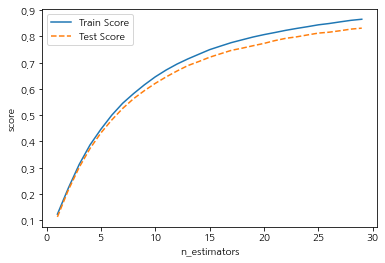

In [47]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

## <span style="color:green">생성되는 트리(모델) 개수 변경 결과</span>
- estimators의 크기가 7일 때, TrainScore와 TestScore의 차이가 제일 적으며, 값이 크다.

In [48]:
# 그래디언트 부스팅 모델 생성 - 2. 잎사귀 노드 최소 자료 수 변경
train_score = []
test_score = []

para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(n_estimators=30, random_state = 1234, min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.870,0.835
1,2,0.869,0.832
2,3,0.868,0.833
3,4,0.868,0.835
4,5,0.867,0.836
5,6,0.866,0.836
6,7,0.867,0.838
7,8,0.867,0.838
8,9,0.865,0.835
9,10,0.864,0.835


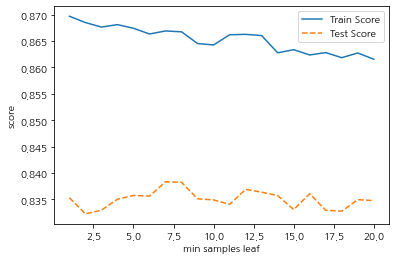

In [49]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples leaf")
plt.legend()

## <span style="color:green">잎사귀 노드 최소 자료 수 변경 결과</span>
- leaf의 크기가 7일 때, TrainScore와 TestScore의 차이가 제일 적으며, 값이 크다.

In [50]:
# 그래디언트 부스팅 모델 생성 - 3. 분리 노드 최소 자료 수 변경
train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(1, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(n_estimators=30, random_state = 1234, min_samples_leaf=7, min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesSplit"] = para_split
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.867,0.838
1,4,0.867,0.838
2,6,0.867,0.838
3,8,0.867,0.838
4,10,0.867,0.838
5,12,0.867,0.838
6,14,0.867,0.838
7,16,0.867,0.838
8,18,0.867,0.838
9,20,0.867,0.838


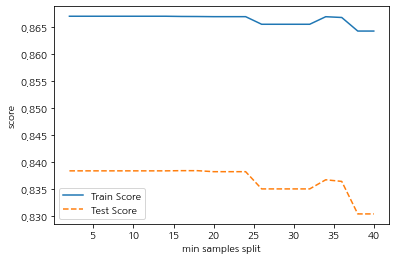

In [51]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

## <span style="color:green">분리 노드 최소 자료 수 변경 결과</span>
- split의 크기가 22일 때, TrainScore와 TestScore의 차이가 제일 적으며, 값이 크다.

In [52]:
#그래디언트 부스팅 모델 생성 - 4. 최대 깊이 변경
train_score = []
test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = RandomForestRegressor(n_estimators=30, random_state = 1234, min_samples_leaf=11, min_samples_split=22, max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["Depth"] = para_depth
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,Depth,TrainScore,TestScore
0,1,0.359,0.346
1,2,0.612,0.588
2,3,0.730,0.682
3,4,0.800,0.749
4,5,0.846,0.793
5,6,0.860,0.805
6,7,0.864,0.807
7,8,0.865,0.808
8,9,0.865,0.808
9,10,0.865,0.808


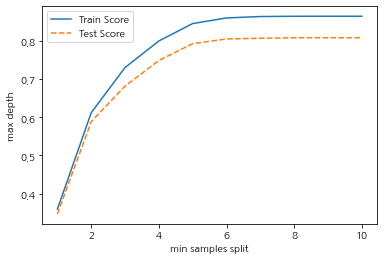

In [53]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.ylabel("max depth")
plt.xlabel("min samples split")
plt.legend()

## <span style="color:green">최대 깊이 변경 결과</span>
- depth의 크기가 4일 때, TrainScore와 TestScore의 차이가 제일 적으며, 값이 크다.

In [54]:
#그래디언트 부스팅 모델 생성 - 5. 학습률 변경
train_score = []
test_score = []

para_lr= [lr for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(n_estimators=30, random_state = 1234, min_samples_leaf=7,\
                                   min_samples_split=22, max_depth=4, learning_rate=v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["LearningRate"] = para_lr
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,LearningRate,TrainScore,TestScore
0,1,9.760000e-01,8.440000e-01
1,2,-0.000000e+00,-1.940000e-01
2,3,-8.555337e+17,-8.534854e+17
3,4,-3.149162e+28,-3.197406e+28
4,5,-9.868049e+35,-1.001922e+36
5,6,-6.436700e+41,-6.535308e+41
6,7,-3.625995e+46,-3.681547e+46
7,8,-3.768393e+50,-3.826130e+50
8,9,-1.136618e+54,-1.154034e+54


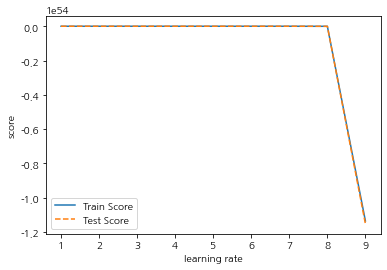

In [55]:
plt.plot(para_lr, train_score, linestyle="-", label="Train Score")
plt.plot(para_lr, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("learning rate")
plt.legend()

## <span style="color:green">학습률 변경 결과</span>
- lr의 크기가 전부 0에 수렴하므로, 0.1을 기준으로 한다. TrainScore와 TestScore의 차이가 제일 적으며, 값이 크다.

In [56]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=11,\
                                     min_impurity_split=22, max_depth=4, learning_rate=0.1)

gb_final.fit(df_train_x, df_train_y)
print("Score on training set : {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set : 0.905
Score on test set : 0.866


In [57]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,age,0.365
0,cement,0.293
3,water,0.133
4,superplasticizer,0.091
1,blast_furnace_slag,0.060
6,fine_aggregate,0.036
5,coarse_aggregate,0.012
2,fly_ash,0.010


In [58]:
# 최종 모델 선정 및 학습
model_final = GradientBoostingRegressor()
model_final.fit(df_train_x, df_train_y)
y_pred = model_final.predict(df_test_x)

df_result = pd.DataFrame()
df_result["실제값"] = df_test_y
df_result["예측값"] = y_pred
df_result

,실제값,예측값
369,15.34,16.924808
544,14.60,15.345993
500,57.92,51.818200
199,15.04,11.286575
262,44.40,42.988183
...,...,...
115,35.10,40.375304
512,32.11,34.395099
232,50.77,46.577952
980,26.92,32.423891


In [59]:
# 예측값과 mse
GradientBoostingMEAN = df_result["예측값"].mean()
GradientBoostingMSE = statsmodels.tools.eval_measures.mse(df_result["실제값"], df_result["예측값"], axis=0)

print('*** GradientBoosting mean, mse ***','\n')
print(f"     {GradientBoostingMEAN}\n     {GradientBoostingMSE}")

*** GradientBoosting mean, mse *** 

     36.137220403966666
     23.270173803284564


Text(0, 0.5, '변수')

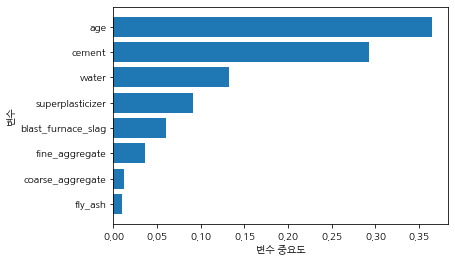

In [37]:
df_importance.sort_values("Importance", ascending=True,inplace=True)
coordinates = range(len(df_importance))

plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

## <span style="color:red">결론</span>
- 앞서 확인한 estimators = 7, leaf = 7, split = 22, depth = 4, lr=0.1의 파라미터를 적용하여 모델을 학습하고, 테스트 데이터를 통해 검사한 결과
- 'strength' 변수에 대한 예측값은 약 36.14로 예상할 수 있다.
- 또한 변수 중요도를 살펴본 결과 age, cement, water의 항목에 따라 결과값이 영향을 받는다는 것을 알 수 있었다.

# <span style="color:red">최종 결론</span>
- 의사결정트리와 그래디언트 부스팅 방법을 이용한 "strength" 변수의 예측값 계산 결과 약 36으로 수렴하는 것을 알 수 있다.
- 의사결정트리의 mse보다 그래디언트 부스팅 방법을 통해 계산된 mse의 값이 더 낮음을 통해 그래디언트 부스팅의 학습결과가 더 좋게 나온 것을 유추할 수 있다.